In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/

## Question 2a

A Python program to run n steps of the Markov chain on an L x L grid can be found below.

In [16]:
# Function for running the Markov chain
def run_MC(n_steps, L, gamma):
    # Keep track of occupied vertices over time, must use tuples to be hashable
    occupied_vertices_over_time = [set()]
    
    for _ in tqdm(range(n_steps)):
        # Get uniformly random vertex in [1, L-1]
        random_vertex = tuple(np.random.randint(low=1, high=L, size=2))
        
        # Check if any neighbors are occupied
        occupied_vertices = occupied_vertices_over_time[-1].copy()
        num_occupied = num_occupied_neighbours(random_vertex, L, occupied_vertices)
        
        # If has any occupied neighbours, then free this vertex
        if num_occupied > 0:
            occupied_vertices.discard(random_vertex)
                
        # If has no occupied neighbours, then set this vertex with probability gamma
        else:
            if np.random.uniform(low=0, high=1) < gamma:
                occupied_vertices.add(random_vertex)
            else:
                occupied_vertices.discard(random_vertex)
        
        # Store the occupied vertices
        occupied_vertices_over_time.append(occupied_vertices)
    return occupied_vertices_over_time


def num_occupied_neighbours(vertex, L, occupied_vertices):
    counter = 0
    directions = [[-1,0], [1,0], [0,-1], [0,1]]
    for direction in directions:
        neighbour = tuple(np.array(vertex) + np.array(direction))
        # Check if neighbour is on boundary or is otherwise occupied
        if 0 in neighbour or L in neighbour or neighbour in occupied_vertices:
            counter += 1
    return counter

## Question 2b and 2c

We run the Markov chain for L = 30 and n = 10^5 across gamma in [0.1, ..., 0.9], starting with an empty configuration (except for the boundary).

Throughout this process, the number of even and odd sites in the central box [10, 20]^2 at each time step is calculated and stored. This data is used to plot the number of even and odd sites in the central box as a function of time. We also keep track of the total number of occupied vertices as well for visualization purposes.

In [4]:
# Setup gamma values [0,1, ..., 0.9]
gammas = [g for g in np.linspace(start=0.1, stop=0.9, num=9)]

In [6]:
# Run the MC for 10^5 steps with L=30 for all gamma values
# Keep track of parity over time
num_even_lists, num_odd_lists, num_tot_lists = [], [], []
for g in gammas:
    print(f"Starting for gamma = {g}")
    print("=========================")
    states = run_MC(n_steps=10**5, L=30, gamma=g)
    num_evens, num_odds, num_tots = [], [], []
    for state in tqdm(states):
        num_even, num_odd, num_tot = 0, 0, 0
        for vertex in state:
            if 10 <= vertex[0] <= 20 and 10 <= vertex[1] <= 20:
                if sum(vertex) % 2 == 0:
                    num_even += 1
                else:
                    num_odd += 1
                num_tot += 1
        num_evens.append(num_even)
        num_odds.append(num_odd)
        num_tots.append(num_tot)
    num_even_lists.append(num_evens)
    num_odd_lists.append(num_odds)
    num_tot_lists.append(num_tots)
    print()

  5%|▌         | 5470/100000 [00:00<00:03, 26672.57it/s]

Starting for gamma = 0.1


  5%|▌         | 5365/100000 [00:00<00:03, 27012.72it/s]


Starting for gamma = 0.2


  6%|▌         | 5552/100000 [00:00<00:03, 27658.20it/s]


Starting for gamma = 0.30000000000000004


  2%|▏         | 2050/100000 [00:00<00:10, 9117.56it/s]


Starting for gamma = 0.4


  5%|▍         | 4625/100000 [00:00<00:04, 22114.27it/s]


Starting for gamma = 0.5


  5%|▍         | 4809/100000 [00:00<00:03, 24761.97it/s]


Starting for gamma = 0.6


  5%|▌         | 5374/100000 [00:00<00:03, 26898.81it/s]


Starting for gamma = 0.7000000000000001


  5%|▍         | 4911/100000 [00:00<00:03, 24191.48it/s]


Starting for gamma = 0.8


  5%|▌         | 5404/100000 [00:00<00:03, 27070.33it/s]


Starting for gamma = 0.9


100%|██████████| 100001/100001 [00:17<00:00, 5717.69it/s]

Text(0.5, 1.0, 'Number of even and odd sites over time with gamma = 0.1')

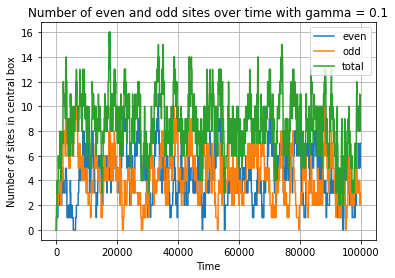

In [7]:
i = 0
plt.plot(num_even_lists[i], label='even')
plt.plot(num_odd_lists[i], label='odd')
plt.plot(num_tot_lists[i], label='total')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Number of sites in central box')
plt.title(f'Number of even and odd sites over time with gamma = {round(gammas[i], 1)}')

Text(0.5, 1.0, 'Number of even and odd sites over time with gamma = 0.2')

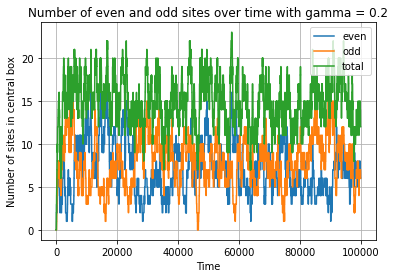

In [8]:
i = 1
plt.plot(num_even_lists[i], label='even')
plt.plot(num_odd_lists[i], label='odd')
plt.plot(num_tot_lists[i], label='total')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Number of sites in central box')
plt.title(f'Number of even and odd sites over time with gamma = {round(gammas[i], 1)}')

Text(0.5, 1.0, 'Number of even and odd sites over time with gamma = 0.3')

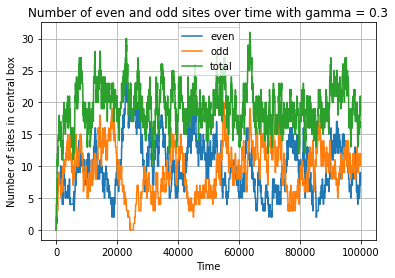

In [9]:
i = 2
plt.plot(num_even_lists[i], label='even')
plt.plot(num_odd_lists[i], label='odd')
plt.plot(num_tot_lists[i], label='total')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Number of sites in central box')
plt.title(f'Number of even and odd sites over time with gamma = {round(gammas[i], 1)}')

Text(0.5, 1.0, 'Number of even and odd sites over time with gamma = 0.4')

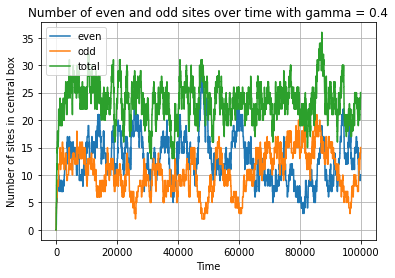

In [10]:
i = 3
plt.plot(num_even_lists[i], label='even')
plt.plot(num_odd_lists[i], label='odd')
plt.plot(num_tot_lists[i], label='total')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Number of sites in central box')
plt.title(f'Number of even and odd sites over time with gamma = {round(gammas[i], 1)}')

Text(0.5, 1.0, 'Number of even and odd sites over time with gamma = 0.5')

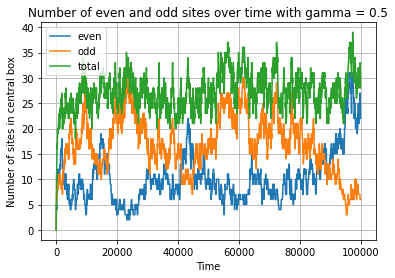

In [11]:
i = 4
plt.plot(num_even_lists[i], label='even')
plt.plot(num_odd_lists[i], label='odd')
plt.plot(num_tot_lists[i], label='total')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Number of sites in central box')
plt.title(f'Number of even and odd sites over time with gamma = {round(gammas[i], 1)}')

Text(0.5, 1.0, 'Number of even and odd sites over time with gamma = 0.6')

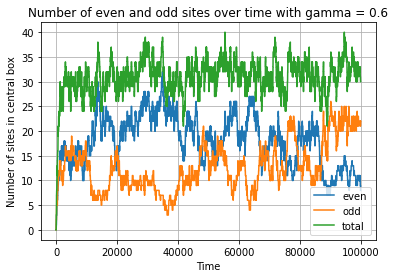

In [12]:
i = 5
plt.plot(num_even_lists[i], label='even')
plt.plot(num_odd_lists[i], label='odd')
plt.plot(num_tot_lists[i], label='total')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Number of sites in central box')
plt.title(f'Number of even and odd sites over time with gamma = {round(gammas[i], 1)}')

Text(0.5, 1.0, 'Number of even and odd sites over time with gamma = 0.7')

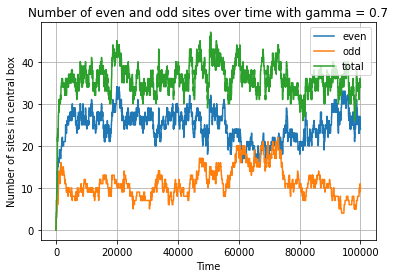

In [13]:
i = 6
plt.plot(num_even_lists[i], label='even')
plt.plot(num_odd_lists[i], label='odd')
plt.plot(num_tot_lists[i], label='total')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Number of sites in central box')
plt.title(f'Number of even and odd sites over time with gamma = {round(gammas[i], 1)}')

Text(0.5, 1.0, 'Number of even and odd sites over time with gamma = 0.8')

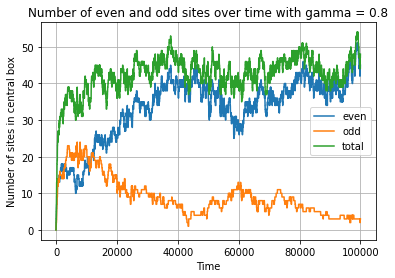

In [14]:
i = 7
plt.plot(num_even_lists[i], label='even')
plt.plot(num_odd_lists[i], label='odd')
plt.plot(num_tot_lists[i], label='total')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Number of sites in central box')
plt.title(f'Number of even and odd sites over time with gamma = {round(gammas[i], 1)}')

Text(0.5, 1.0, 'Number of even and odd sites over time with gamma = 0.9')

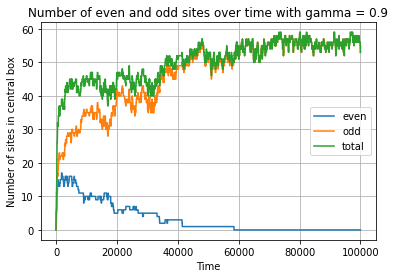

In [15]:
i = 8
plt.plot(num_even_lists[i], label='even')
plt.plot(num_odd_lists[i], label='odd')
plt.plot(num_tot_lists[i], label='total')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Number of sites in central box')
plt.title(f'Number of even and odd sites over time with gamma = {round(gammas[i], 1)}')

## Question 2d

Looking at the 9 plots varying gamma from 0.1 to 0.9, we see that there is an apparent change at gamma = 0.8.

Below this value of gamma, the number of even and odd sites appears to remain around the same level, and both values oscillate above and below each other repeatedly. This makes sense, as a small gamma means there is a smaller likelihood of adding vertices and a greater likelihood of removing vertices. This means that the grid will be more empty, so the vertices will typically have less neighbours. Less neighbours results in less correlation in the parity between points because there are few restrictions, which means we should expect a roughly equal number of even and odd vertices in the central box. 

At and above this value of gamma, the number of even sites and the number of odd sites appears to diverge, with either odd or even values taking up almost all of the sites in the central box. This makes sense, as a large gamma means there is a larger likelihood of adding vertices and smaller likelihood of removing vertices than if we used a smaller gamma. This means that the grid will be more full so the vertices will typically have more neighbours. More neighbours means that there are a greater number of "restrictions" around which vertices can be added. This more tightly packed configuration results in a high correlation in the parity between vertices, as a full grid will typically have almost all even parity vertices or odd parity vertices. 